## Building a Machine Learning Model: Model Building

In the following tutorial, we will go through a practical example of building a Machine Learning Model. There will be a notebook for each one of the Machine Learning Model steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Wrap up for Deployment

**This is the notebook for step 4: Model Building**

We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses. 

### Why is this important? 

Predicting house prices is useful to identify fruitful investments, or to determine whether the price advertised for a house is over or underestimated, before making a buying judgment.

### What is the objective of the machine learning model?

The objective of our model is to minimise the difference between the actual price and the estimated price of a house. We will evaluate model performance using the mean squared error (MSE) and the root squared of the mean squared error (RMSE).

### How do I download the dataset?

To download the House Price dataset go this website:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Scroll down to the bottom of the page, and click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Rename the file as 'houseprice.csv' and save it to a directory of your choice.

**Note the following:**
-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the same directory where you saved this jupyter notebook, then you can run the code as it is written here.

====================================================================================================

## House Prices dataset: Machine Learning Model build

In the following cells, we will finally build our machine learning models, utilising the engineered data and the pre-selected features. 


### Setting the seed

It is important to note, that we are engineering variables and pre-processing data with the idea of deploying the model if we find business value in it. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

Let's go ahead and load the dataset.

In [39]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# to build the models
from sklearn.linear_model import Lasso

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [40]:
# load dataset
# We  load the datasets with the engineered values: we built and saved this datasets in a previous notebook - feature engineering.
# If you haven't done so, go ahead and check the previous notebook to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

In [41]:
# subset the target from both train and test sets
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

In [42]:
# load selected features
# we selected the features in the previous notebook
# if you haven't done so, go ahead and visit the previous notebook to find out how to select
# the features

features = pd.read_csv('selected_features.csv', header=None)
features = [x for x in features[0]] 

# here I will add a feature, although it was not selected by our our model in our feature selection
# step. There is a key feature engineering steps I'll like to discuss further during the deployment
# step. 

features = features + ['LotFrontage'] 

features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'LotFrontage']

In [43]:
# reduce the train and test set to the desired features

X_train = X_train[features]
X_test = X_test[features]

### Train the model - Regularised linear regression

Remember to set the seed.

In [44]:
# train the model
# remember to set the random_state / seed

# specify the model to use
lin_model = Lasso(alpha=0.005, random_state=0)

# fit the model to to the train set. If you don't fit the model, you will get an error.
lin_model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)

### Evaluate the model (MSE and RMSE)

In [45]:
# First: use the fitted model to get predictions

# Second: in order to get the true performance of the Lasso regression, we need to transform 
# both the target (true SalePrice) and the predictions (predicted SalePrice) to the original
# house prices value - Remember, we log transformed the output (SalePrice) during the
# feature engineering step.

# Third: We will evaluate performance using the mean squared error and the root of the mean 
# squared error. The mean_squared_error object takes the (true SalePrice, predicted SalePrice) 
# and returns MSE

pred = lin_model.predict(X_train)

print('linear train mse: {}'.format(mean_squared_error(np.exp(y_train), np.exp(pred))))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('Average house price train set: ', np.exp(y_train).median())
print()
pred = lin_model.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(np.exp(y_test), np.exp(pred))))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('Average house price test set: ', np.exp(y_test).median())

linear train mse: 1087435415.4414527
linear train rmse: 32976.28565259364
Average house price train set:  163000.00000000012

linear test mse: 1405259552.2596025
linear test rmse: 37486.79170400693
Average house price test set:  161199.99999999977


### Evaluate the model prediction performance

Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

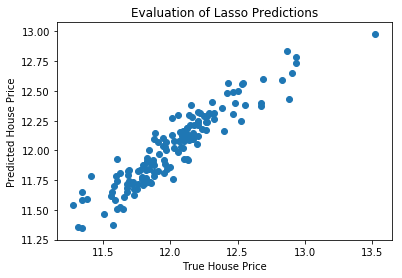

In [46]:
# let's evaluate our predictions respect to the original price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

As we can see, there is a clear correlation between the acutual and predicted house prices. This indicates our model is doing a pretty good job at estimating house prices.

### Examine the model errror distribution

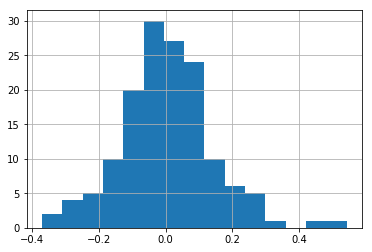

In [47]:
# let's evaluate the distribution of the errors: They should have fairly normally distribution.
errors = y_test - lin_model.predict(X_test)
errors.hist(bins=15)

The distribution of the errors follows quite closely a gaussian distribution. That suggests that our model is doing a good job as well.

### Just for fun: What are the most important features of the model?

Text(0.5, 1.0, 'Feature Importance')

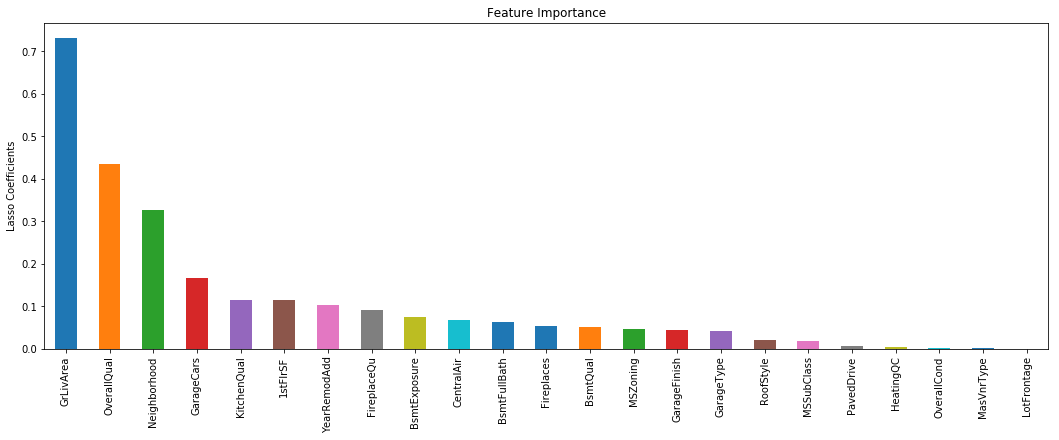

In [48]:
importance = pd.Series(np.abs(lin_model.coef_.ravel()))
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Coefficients')
plt.title('Feature Importance')

And that is all! Now we have our entire pipeline ready for deployment. In the next section, I will summarise which steps from the pipeline we will deploy or in other words, put in production.